# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
import pandas as pd
import numpy as np # importar librerías
from matplotlib import pyplot as plt

In [2]:
instacart_order= pd.read_csv('/datasets/instacart_orders.csv', sep= ';') # leer conjuntos de datos en los DataFrames
products= pd.read_csv('/datasets/products.csv', sep= ';')
aisles= pd.read_csv('/datasets/aisles.csv', sep= ';')
departments= pd.read_csv('/datasets/departments.csv', sep= ';')
order_products= pd.read_csv('/datasets/order_products.csv', sep= ';')

In [3]:
instacart_order.info() # mostrar información del DataFrame
display(instacart_order.sample(5, random_state= 478967))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
446415,1289301,142434,46,6,14,6.0
352089,2328827,52198,4,5,11,7.0
467968,3221592,53142,2,3,18,22.0
319487,2012419,183144,6,6,12,3.0
215623,115927,177368,3,4,9,4.0


In [4]:
products.info() # mostrar información del DataFrame
display(products.sample(5, random_state= 49694))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
37969,37970,Bartlett in Heavy Syrup Pear Halves,99,15
47796,47797,Chianti Wine,28,5
17115,17116,100% Juice Pineapple Juice,98,7
12950,12951,Fruit and Nut Granola,57,14
43964,43965,Glazed Buttermilk Doughnuts,8,3


In [5]:
aisles.info() # mostrar información del DataFrame
display(aisles.sample(5, random_state= 134))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
96,97,baking supplies decor
2,3,energy granola bars
76,77,soft drinks
69,70,digestion
85,86,eggs


In [6]:
departments.info()  # mostrar información del DataFrame
display(aisles.sample(5, random_state= 21))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,aisle_id,aisle
111,112,bread
7,8,bakery desserts
38,39,seafood counter
81,82,baby accessories
46,47,vitamins supplements


In [7]:
order_products.info(show_counts=True)  # mostrar información del DataFrame
display(order_products.sample(5, random_state= 4545007))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
276443,2918139,26104,9.0,1
4511493,2446958,19660,7.0,1
275844,2062981,13176,3.0,1
1466055,391777,19316,1.0,1
4325199,553303,26924,8.0,0


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

Al leer los datos extraidos con .info() se pueden observar datos de cada df como: los índices totales, los nombres de las columnas, los valores no nulos, la memoria usada en cada dataFrame (df), también se puede ver el tipo de datos de las columnas. Hay 3 df que tienen columnas con valores nulos; específicamente: la columna days_since_prior_order del df instacart_orders, la columna product_name del df products y la columna add_to_cart_order del df order_products.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
print(instacart_order.duplicated()) # Revisa si hay pedidos duplicados
print()
print("Número de duplicados:")
print(instacart_order.duplicated().sum())
print()

0         False
1         False
2         False
3         False
4         False
          ...  
478962    False
478963    False
478964    False
478965    False
478966    False
Length: 478967, dtype: bool

Número de duplicados:
15



No se observan valores duplicados al ejecutar duplicated() pero al aplicar el método y sumarlo aparece que hay 15, lo que puede significar que hay valores parcialmente duplicados o repetidos, al aplicar isna() aparecen valores nulos en la columna days_since_prior_order.

In [9]:
instacart_order['order_dow'] = instacart_order['order_dow'].astype(int)# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
wednesday_2am= instacart_order[(instacart_order['order_dow']== 2) & (instacart_order['order_hour_of_day'] == 2)]
print(wednesday_2am)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
1295     1474941   115569             5          2                  2   
2391     1640269   173965            15          2                  2   
2550     1223696    55276            11          2                  2   
5965      579194    85018            14          2                  2   
17680    2004230   203121             4          2                  2   
...          ...      ...           ...        ...                ...   
457660   1562381    19378             5          2                  2   
460316   1986084   117453            81          2                  2   
462676   1362113    19654            20          2                  2   
472800   1746383    88484            19          2                  2   
472923   1519815   149345             1          2                  2   

        days_since_prior_order  
1295                      28.0  
2391                       2.0  
2550                    

¿Qué sugiere este resultado?\t
Sugiere que para este filtrado existen 136 filas y 6 columnas, las cuales serían los pedidos que se hicieron el miércoles 2 a las 2A.M. También se puede ver que aparece un valor nulo NaN.

In [10]:
# Elimina los pedidos duplicados
instacart_order= instacart_order.drop_duplicates()
print(instacart_order)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

In [11]:
print(instacart_order.duplicated().sum()) # Vuelve a verificar si hay filas duplicadas
print()
print(instacart_order.duplicated())

0

0         False
1         False
2         False
3         False
4         False
          ...  
478962    False
478963    False
478964    False
478965    False
478966    False
Length: 478952, dtype: bool


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(instacart_order['order_id'].duplicated().sum())
print()

0



Describe brevemente tus hallazgos y lo que hiciste con ellos:

a)En primera instancia, realicé un filtrado para revisar si el archivo contiene duplicados con duplicated() + insna() para verificar los valores nulos.
b)Realicé un filtrado para revisar todos los pedidos que se realizaron el día miércoles 2 a las 2 a.m y los revise para ver si tenían duplicados o valores nulos.
c) Luego apliqué drop_duplicates() sobre el df para eliminar todos los valores duplicados.
d) comprobé con duplicated() nuevamente para comprobar que se hayan eliminado los duplicados.

### `products` data frame

In [13]:
print(products.duplicated())# Verifica si hay filas totalmente duplicadas
print()
print("Número total de filas duplicadas:")
print(products.duplicated().sum())

0        False
1        False
2        False
3        False
4        False
         ...  
49689    False
49690    False
49691    False
49692    False
49693    False
Length: 49694, dtype: bool

Número total de filas duplicadas:
0


In [14]:
print(products['product_id'].duplicated().sum())# Verifica únicamente si hay IDs duplicadas de productos



0


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
print("Nombres duplicados de productos:")
products['product_name']= products['product_name'].str.upper()
print(products['product_name'].duplicated().sum())
print()
print(products['product_name'].head(15))

Nombres duplicados de productos:
1361

0                            CHOCOLATE SANDWICH COOKIES
1                                      ALL-SEASONS SALT
2                  ROBUST GOLDEN UNSWEETENED OOLONG TEA
3     SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...
4                             GREEN CHILE ANYTIME SAUCE
5                                          DRY NOSE OIL
6                        PURE COCONUT WATER WITH ORANGE
7                     CUT RUSSET POTATOES STEAM N' MASH
8                     LIGHT STRAWBERRY BLUEBERRY YOGURT
9        SPARKLING ORANGE JUICE & PRICKLY PEAR BEVERAGE
10                                    PEACH MANGO JUICE
11                           CHOCOLATE FUDGE LAYER CAKE
12                                    SALINE NASAL MIST
13                       FRESH SCENT DISHWASHER CLEANER
14                             OVERNIGHT DIAPERS SIZE 6
Name: product_name, dtype: object


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
duplicates= products['product_name'].duplicated(keep=False) & ~products['product_name'].isnull()
total_rows = products[duplicates].shape[0]
print("El total de filas es:", total_rows)
print()
print(products[duplicates])

El total de filas es: 207

       product_id                                     product_name  aisle_id  \
41             42                                  BIOTIN 1000 MCG        47   
185           186       FRESH SCENT DISHWASHER DETERGENT WITH DAWN        74   
515           516                           AMERICAN CHEESE SLICES        21   
1538         1539                                 CAULIFLOWER HEAD        83   
1783         1784              NUTRITION PROTEIN MIX BLUEBERRY NUT       117   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       depar

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Al realizar el primer filtrado buscando duplicados el método no los encontró. Luego al revisar la columna 'product_name', se aplicó el método str.upper para pasar todos los datos a mayúscula y que se realice el filtrado duplicated() una vez más sin problema. En ese filtrado se hayaron 1361 datos duplicados.
Luego para revisar si existen nombres duplicados de productos no faltantes, cree una variable (duplicates) para realizar un filtrado donde en el primero utilizo el método duplicated() para buscar los duplicados y lo uní con otro filtrado con isnull() para buscar los valores no faltantes, como resultado obtuve 207 filas que cumplen con el filtrado.

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
print(departments.duplicated())
print(departments.duplicated().sum())

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool
0


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
print("Número de duplicados en 'department_id'")
print(departments['department_id'].duplicated().sum())
print(departments['department_id'].duplicated())
print()
print("Número de duplicados en 'department'")
print(departments['department'].duplicated().sum())
print(departments['department'].duplicated())

Número de duplicados en 'department_id'
0
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
Name: department_id, dtype: bool

Número de duplicados en 'department'
0
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
Name: department, dtype: bool


Al aplicar los métodos para filtrar y revisar si existen duplicados en estas columnas, no se hayan datos duplicados.

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
print("Valores duplicados:")
print(aisles.duplicated().sum())
print()
print(aisles.duplicated())



Valores duplicados:
0

0      False
1      False
2      False
3      False
4      False
       ...  
129    False
130    False
131    False
132    False
133    False
Length: 134, dtype: bool


In [20]:
# Revisa únicamente si hay IDs duplicadas de productos
print(aisles['aisle_id'].duplicated().sum())

0


Al aplicar los métodos para filtrar y revisar si existen duplicados en estas columnas, no se hayan datos duplicados.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
print("Valores duplicados:")
print(order_products.duplicated().sum())
print()

Valores duplicados:
0



In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(order_products.duplicated(subset=['order_id', 'product_id']).sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Al aplicar los métodos para filtrar y revisar si existen duplicados en estas columnas, no se hayan datos duplicados.
En la pregunta anterior sólo volví a verificar si habia otro duplicado engañoso en las columnas ['order_id', 'product_id'] porque las otras columnas solo tratan datos como, si los clientes volvieron a comprar x artículo y el orden en que agregaron cada artículo al carrito, por lo que las descarté para buscar duplicados engañosos.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
display(products['product_name'].isnull())
print()
print("Valores ausentes dentro de esta columna:")
print(products['product_name'].isna().sum())

0        False
1        False
2        False
3        False
4        False
         ...  
49689    False
49690    False
49691    False
49692    False
49693    False
Name: product_name, Length: 49694, dtype: bool


Valores ausentes dentro de esta columna:
1258


Describe brevemente cuáles son tus hallazgos.
Hay 1258 valores ausentes en la columna product_name.


In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
other_null= products[(products['product_name'].isnull()) & (aisles['aisle_id'] == 100)]
print(other_null)

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


Al realizar el filtrado no aparecen productos ausentes relacionados con el pasillo 100.

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
null_21= products[(products['product_name'].isnull()) & (departments['department_id'] == 21)]

print(null_21)

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


No, ya que al aplicar el filtrado para buscar los valores ausentes + los valores solo del departemento 21 no aparecen valores coincidentes.

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
aisle_100= aisles[aisles['aisle_id'] == 100] #Filtro para obtener sólo el pasillo 100
print("Datos de aisle_id 100: \n", aisle_100)
print()
products_aisle_100 = products[products['aisle_id'] == 100] #Filtro para obtener sólo los productos del pasillo 100
print("\nProductos asociados al pasillo con id 100:")
display(products_aisle_100)
print()
department_21 = departments[departments['department_id'] == 21]  #Filtro para obtener sólo el departamento 21
print("\nDatos de department_id 21: \n", department_21)
print()
products_department_21 = products[products['department_id'] == 21] #Filtro para obtener sólo los productos asociados al dpto 21
print("\nProductos asociados al departamento 21:")
display(products_department_21)



Datos de aisle_id 100: 
     aisle_id    aisle
99       100  missing


Productos asociados al pasillo con id 100:


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21




Datos de department_id 21: 
     department_id department
20             21    missing


Productos asociados al departamento 21:


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Al revisar los resultados si aparecen datos ausentes en la columna product_name relacionados tanto al pasillo 100 como al departamento 21.

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)
print(products['product_name'].isna().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Al hallar los valores ausentes, utilicé el método fillna para reemplazarlos por Unknown ya al eliminar los valores ausentes podría afectar a la investigación. Luego realizar el reemplazo utilicé isna().sum() para verificar que todos los valores nulos se cambiaron exitosamente a unknown. Esto se comprueba porque el resultado fue 0.

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
print("Valores ausentes dentro del DatafFrame:")
print(instacart_order.isna().sum())  #Para ver si hay valores ausentes

Valores ausentes dentro del DatafFrame:
order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
not_first_order= instacart_order[instacart_order['order_number'] !=1] #filtra entre los pedidos que no sean el primero de los clientes
val_ausent_not_1st_order= not_first_order[not_first_order.isna().sum(axis=1) >0] #busca los valores nulos y suma los valores ausentes en cada fila
print(val_ausent_not_1st_order)


instacart_order['days_since_prior_order'] = instacart_order['days_since_prior_order'].fillna('') #Reemplaza los valores ausentes por ('')


Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Al filtrar se pudo ver que hay valores ausentes en la columna days_since_prior_order del df.
Luego al revisar si existen valores ausentes en algún pedido de los clientes que no sea su primer pedido, no se observan.
Para terminar reemplacé los valores ausentes por ('').


### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
order_prod_ausent_val = order_products.isna().sum()
print(order_prod_ausent_val)

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
min_value = order_products['add_to_cart_order'].min()
max_value = order_products['add_to_cart_order'].max()

print("Valor mínimo en 'add_to_cart_order':", min_value)
print("Valor máximo en 'add_to_cart_order':", max_value)


Valor mínimo en 'add_to_cart_order': 1.0
Valor máximo en 'add_to_cart_order': 64.0


Describe brevemente cuáles son tus hallazgos.

Lo artículos mínimos que han añadido al carro es 1 y lo máximo son 64.

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
ausent_id= order_products[order_products['add_to_cart_order'].isnull()]['order_id']
print(ausent_id)



737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
#Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
def verificar_productos_ausentes(order_products):
    ausent_id = order_products[order_products['add_to_cart_order'].isnull()]['order_id'] 
    isin_order_products = order_products[order_products['order_id'].isin(ausent_id)] #selecciono solo las filas donde order_id esta presente en ausent_id
    orders_with_missing_values = isin_order_products.groupby('order_id')['product_id'].count()

    all_more_64_product = (orders_with_missing_values.min() > 64)
    return all_more_64_product, orders_with_missing_values

all_more_64_products, count_missing_products = verificar_productos_ausentes(order_products)

print("¿Todos los pedidos con valores ausentes tienen más de 64 productos?:", all_more_64_products)
print("\nCantidad de productos en pedidos con valores ausentes:")
display(count_missing_products)




¿Todos los pedidos con valores ausentes tienen más de 64 productos?: True

Cantidad de productos en pedidos con valores ausentes:


order_id
9310        65
61355      127
102236      95
129627      69
165801      70
          ... 
2999801     70
3125735     86
3308010    115
3347453     71
3383594     69
Name: product_id, Length: 70, dtype: int64

Describe brevemente cuáles son tus hallazgos.
si, al realizar el filtrado se puede observar que los pedidos con valores ausentes cuentan con >64 artículos.

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'].fillna(999, inplace=True)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)
print(order_products['add_to_cart_order'])

0          17
1           1
2           1
3          35
4           5
           ..
4545002    12
4545003     9
4545004     4
4545005     8
4545006     9
Name: add_to_cart_order, Length: 4545007, dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Para reemplazar los valores ausentes de la columna utilicé el método fillna, posterior utilicé el método astype para que todos los valores se conviertan en números enteros.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos
Al evaluar los datos aparecen datos ausentes los cuales fueron reemplazados, hay varios productos con valores ausentes en el pasillo 100 y en el dpto 21. También se encontraron valores duplicados los cuales fueron eliminados.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
def order_hour(instacart_order):
    hour_outliers = instacart_order[(instacart_order['order_hour_of_day'] < 0) | (instacart_order['order_hour_of_day'] > 23)]
    if hour_outliers.empty:
        print("Todos los valores oscilan entre 0 y 23 en 'order_hour_of_day'.")
    else:
        print("Valores fuera de rango en 'order_hour_of_day':")
        print(hour_outliers)
order_hour(instacart_order)

Todos los valores oscilan entre 0 y 23 en 'order_hour_of_day'.


In [36]:
def day_order(instacart_order):
    day_outliers = instacart_order[(instacart_order['order_dow'] < 0) | (instacart_order['order_dow'] > 6)]

    if day_outliers.empty:
        print("Todos los valores oscilan entre 0 y 6 en 'order_dow'.")
    else:
        print("Valores fuera de rango en 'order_dow':")
        print(day_outliers)
day_order(instacart_order)

Todos los valores oscilan entre 0 y 6 en 'order_dow'.


Escribe aquí tus conclusiones

Los valores se encuentran dentro de los rangos esperados, sin encontrarse valores atipicos.


### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

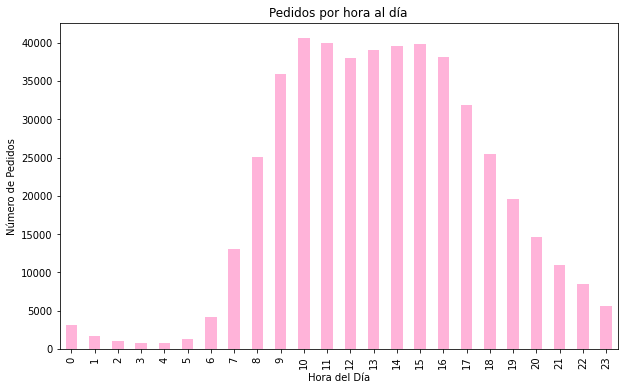

In [37]:
order_count_day= instacart_order['order_hour_of_day'].value_counts().sort_index()

order_count_day.plot(title='Pedidos por hora al día',
        figsize=[10, 6],
        color='hotpink',
        xlabel='Hora del Día',
        ylabel='Número de Pedidos',
        x='order_id',
        kind= 'bar',
        alpha=0.5)
plt.show()

Escribe aquí tus conclusiones
Se puede observar que entre las 10 y las 16 hrs es cuando más personas realizan pedidos, se podria inferir que es debido a que a esa hora los trabajadores generalmente tienen un descanso para almorzar o colación.
El pick de pedidos durante el llega a alcanzar cerca de los 40.000 pedidos y lo mínimo correspondería en la madrugada cerca de los 3000-4000 pedidos entre las horas de 0-5AM.

### [A3] ¿Qué día de la semana compran víveres las personas?

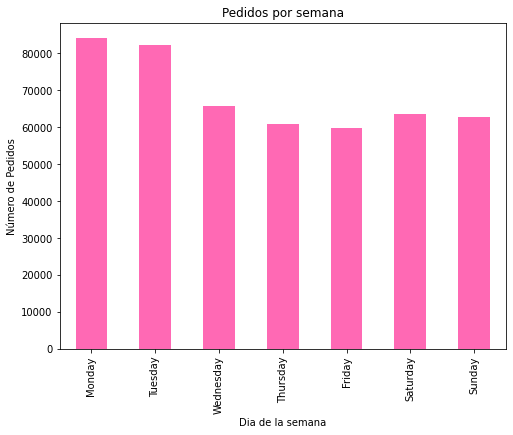

In [38]:
order_count_week= instacart_order['order_dow'].value_counts().sort_index()
days={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
order_count_week.index = order_count_week.index.map(days)

order_count_week.plot(title='Pedidos por semana',
        figsize=[8, 6],
        color='hotpink',
        xlabel='Dia de la semana',
        ylabel='Número de Pedidos',
        x= 'days',
        kind= 'bar')
plt.show()

Escribe aquí tus conclusiones
Se puede observar que los días que las personas compran más víveres son los días Lunes y Martes sobrepasando los 80000 pedidos durante esos días, los días que menos compran jueves y viernesalcanzando 60000 pedidos aprox.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

Valor mínimo de días transcurridos entre pedidos: 0
Valor máximo de días transcurridos entre pedidos: 30


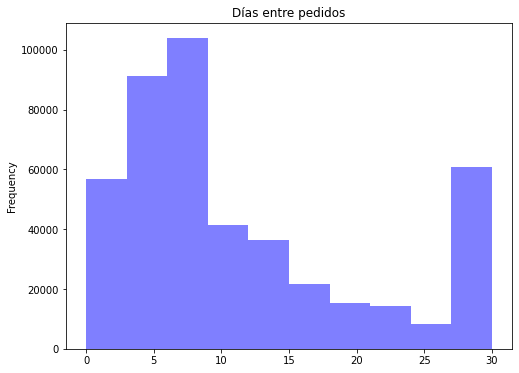

In [39]:
# Convierto los datos a numéricos con to_numeric para poder trabajar con estos datos
instacart_order['days_since_prior_order'] = pd.to_numeric(instacart_order['days_since_prior_order'], errors='coerce')
# Encuentra el valor mínimo de días transcurridos entre pedidos
min_days_since_prior_order = instacart_order['days_since_prior_order'].min()

# Encuentra el valor máximo de días transcurridos entre pedidos
max_days_since_prior_order = instacart_order['days_since_prior_order'].max()

print("Valor mínimo de días transcurridos entre pedidos:", min_days_since_prior_order.astype(int))
print("Valor máximo de días transcurridos entre pedidos:", max_days_since_prior_order.astype(int))

instacart_order['days_since_prior_order'].plot(title='Días entre pedidos',
        figsize=[8, 6],
        color='blue',
        xlabel='Número de días',
        ylabel='Frecuencia',
        kind= 'hist',
        alpha= 0.5)
plt.show()

Escribe aquí tus conclusiones

Hay clientes que en el mismo día realizan otro pedido y otros que esperan un mes (30 días) para realizar otro pedido.

Según el gráfico la mayoria de los usuarios luego de 4-9 aprox realizan otro pedido

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

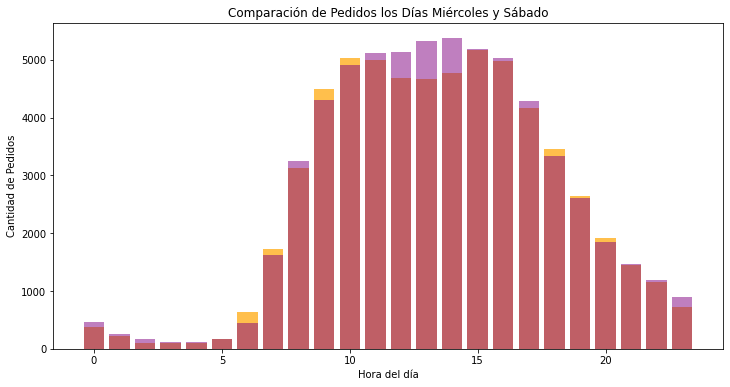

In [40]:
wednesday_order = instacart_order[instacart_order['order_dow'] == 3]
saturday_order = instacart_order[instacart_order['order_dow'] == 6]
wednesday_distribution = wednesday_order['order_hour_of_day'].value_counts().sort_index()
saturday_distribution = saturday_order['order_hour_of_day'].value_counts().sort_index()

plt.figure(figsize=[12, 6])
plt.bar(wednesday_distribution.index, wednesday_distribution.values, color='orange', alpha=0.7, label='Miércoles')
plt.bar(saturday_distribution.index, saturday_distribution.values, color='purple', alpha=0.5, label='Sábado')

plt.title('Comparación de Pedidos los Días Miércoles y Sábado')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de Pedidos')
plt.show()


Los días miércoles alcanzan +5000 pedidos y las horas en las que hay más pedidos durante el día es entre las 10 y las 16hrs, luego va disminuyendo la frecuencia de pedidos durante ese día.


Los días sábado sobrepasan los +5000 pedidos, las horas en las que se realizan más pedidos son entre las 10 y las 16hrs, luego con las horas los pedidos van disminuyendo.

Escribe aquí tus conclusiones

Los días miercoles y sábados hay una similar cantidad de pedidos pero la diferencia que se puede hallar entre entos dos días son las horas puntas:
Los días miércoles hay más pedidos entre 10-11 ,luego disminuyen un poco, y vuelven a subir entre las 15-16 hrs, en esas horas los pedidos sobrepasan o rondan los 5000.
Los días sábados las horas en las que los pedidos sobrepasan o rondan los 5000, a diferencia de los miércoles, se mantienen constantes desde las 10 de la mañana hasta las 16hrs.


### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [41]:
order_per_client= instacart_order.groupby('user_id')['order_id'].count().sort_index() #agrupo los pedidos para cada cliente y los ordena 


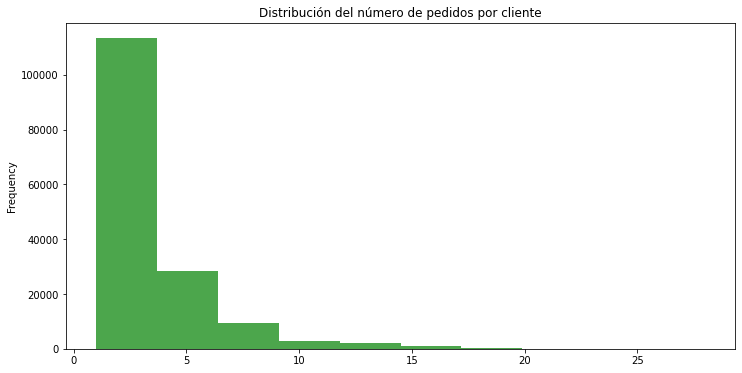

In [42]:
order_per_client.plot(title='Distribución del número de pedidos por cliente',
        figsize=[12, 6],
        color='green',
        xlabel= 'Número de pedidos',
        ylabel='Clientes',
        kind= 'hist',
        alpha= 0.7)
plt.show()

Escribe aquí tus conclusiones

La mayoria de los clientes han hecho más de 3 pedidos aprox desde que se abrieron una cuenta en instacart, son menos los clientes que han hecho +15 productos.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [43]:
top_20_products = order_products['product_id'].value_counts().head(20) 
#filtro la columna que posee los id únicos de cada producto, los cuenta entre los que más aparecen y muestra los primeros 20

In [44]:
top_20_product_names = products[products['product_id'].isin(top_20_products.index)][['product_id', 'product_name']]
#busco dentro de la columna 'product_id', verifico los valores de mi variable, la ordeno con el método index y muestro las columnas product_id y product_name

In [45]:
print("Los 20 productos más populares son:")
display(top_20_product_names)

Los 20 productos más populares son:


,product_id,product_name
5875,5876,ORGANIC LEMON
8276,8277,APPLE HONEYCRISP ORGANIC
13175,13176,BAG OF ORGANIC BANANAS
16796,16797,STRAWBERRIES
21136,21137,ORGANIC STRAWBERRIES
21902,21903,ORGANIC BABY SPINACH
22934,22935,ORGANIC YELLOW ONION
24851,24852,BANANA
24963,24964,ORGANIC GARLIC
26208,26209,LIMES


Escribe aquí tus conclusiones.

El top 20 de productos más populares son productos orgánicos, frutas y verduras.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [46]:
items_per_order = order_products.groupby('order_id')['product_id'].count() #Agrupo las columnas order_id y product_id, y las guardo en una variable
items_per_order_mean= items_per_order.mean() #utilizando la variable que cree calculo la media

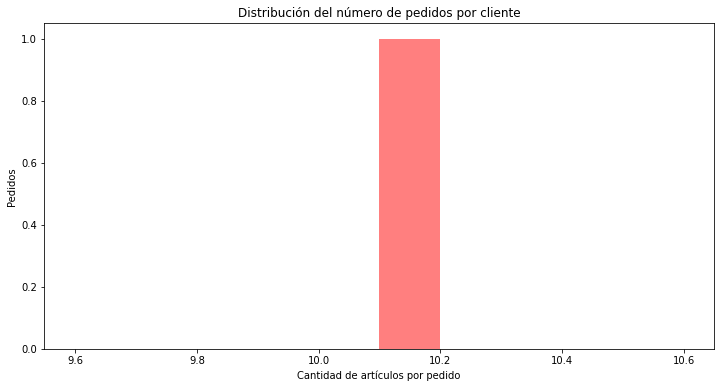

In [47]:
plt.figure(figsize=(12, 6))
plt.hist(items_per_order_mean, color='red', alpha=0.5)

plt.title('Distribución del número de pedidos por cliente')
plt.xlabel('Cantidad de artículos por pedido')
plt.ylabel('Pedidos')

plt.show()

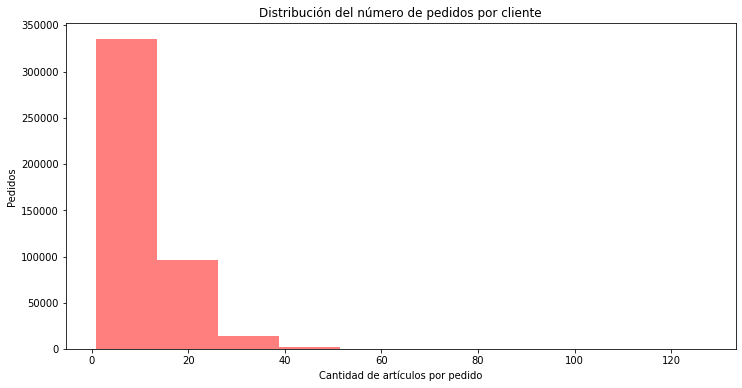

In [48]:
plt.figure(figsize=(12, 6))
plt.hist(items_per_order, color='red', alpha=0.5)

plt.title('Distribución del número de pedidos por cliente')
plt.xlabel('Cantidad de artículos por pedido')
plt.ylabel('Pedidos')

plt.show()

Escribe aquí tus conclusiones
En un pedido la media de artículos que compran las personas en un pedido es 10.
La gran mayoria de las personas piden 10 artículos aprox y van disminuyendo los clientes que piden más de 20.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [49]:
reorder_frequency = order_products.groupby('product_id')['reordered'].sum().reset_index() 
#agrupo las columnas 'product_id' y 'reordered' , sumo los datos de la columna reordered y reinicio los índices

In [50]:
reorder_frequency.columns = ['product_id', 'reorder_frequency'] #especifico los nombres de las columnas a mis variables 

In [51]:
top_20_reorder = reorder_frequency.sort_values(by='reorder_frequency', ascending=False).head(20) 
#sobre la variable reorder frecuency aplico sort_values para reordenar en orden decreciente y muestro los primeros 20

In [52]:
top_20_product_names = pd.merge(top_20_reorder, products[['product_id', 'product_name']], on='product_id')
#fuciono con merge() la variable top_20_reorder con  products[['product_id', 'product_name']] usando la columna común product_id

print("Los 20 productos más reordenados son:")
display(top_20_product_names)

Los 20 productos más reordenados son:


,product_id,reorder_frequency,product_name
0,24852,55763,BANANA
1,13176,44450,BAG OF ORGANIC BANANAS
2,21137,28639,ORGANIC STRAWBERRIES
3,21903,26233,ORGANIC BABY SPINACH
4,47209,23629,ORGANIC HASS AVOCADO
5,47766,18743,ORGANIC AVOCADO
6,27845,16251,ORGANIC WHOLE MILK
7,47626,15044,LARGE LEMON
8,27966,14748,ORGANIC RASPBERRIES
9,16797,13945,STRAWBERRIES


Escribe aquí tus conclusiones
El top 20 artículos que vuelven a pedirse los clientes con mayor frecuencia es 19/20 similar al top 20 de los más populares.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [53]:
product_ratio = order_products.groupby('product_id')['reordered'].mean().reset_index() 
#agrupo las columnas de product id y reordered y calculo la media de los productos reordenados

In [54]:
product_ratio.columns = ['product_id', 'reorder_ratio'] #especifico las columnas que tendrá mi variable

In [55]:
display(product_ratio.head(5))

,product_id,reorder_ratio
0,1,0.564286
1,2,0.000000
2,3,0.738095
3,4,0.510204
4,7,0.500000


Escribe aquí tus conclusiones
en la tabla se puede ver que hay productos que han sido reordenados por lo que es más probable que sigan siendo ordenados por otros usuarios. Excepto el segundo producto que tiene 0.000% que significa que según los datos que hay, nunca ha sido reordenado.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [56]:
merged_data = pd.merge(order_products, instacart_order, on='order_id') #uno con merge los datos de order_products y instacart_order 
reorder_mean = merged_data.groupby('user_id')['reordered'].mean() #agrupo por 'user_id', accedo a reorder y utilizo mean para calcular la taza

print("Tasa media de productos reordenados por user_id:")
display(reorder_mean.head(20))


Tasa media de productos reordenados por user_id:


user_id
2     0.038462
4     0.000000
5     0.666667
6     0.000000
7     0.928571
11    0.200000
12    0.250000
13    0.565217
14    0.360656
15    0.538462
16    0.531250
17    0.716981
19    0.291667
20    0.000000
21    0.400000
22    1.000000
24    0.500000
26    0.437500
27    0.658824
28    0.500000
Name: reordered, dtype: float64

Escribe aquí tus conclusiones.

Para cada cliente la proporción de artículos que ha ordenado y que ha reordenado varía cliente a cliente, pero la gran mayoría había ordenado en alguna ocación el producto.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [57]:
top_first_in_cart = order_products[order_products['add_to_cart_order'] == 1]
#Filtro los productos que tienen la posición 1 de agragado al carrito

top_20_first_in_cart = top_first_in_cart['product_id'].value_counts().head(20)
#cuento la frecuencia de los productos y guardo lo primeros 20
# Obtener los nombres de los productos correspondientes a los IDs
top_20_product_names = products[products['product_id'].isin(top_20_first_in_cart.index)][['product_id', 'product_name']]
#verifico que los valores de la columna products esten en top_20_first_in_cart y conservo las columnas product_id y product_name
print("Los 20 principales productos que las personas ponen primero en sus carritos son:")
display(top_20_product_names)


Los 20 principales productos que las personas ponen primero en sus carritos son:


,product_id,product_name
195,196,SODA
5784,5785,ORGANIC REDUCED FAT 2% MILK
12340,12341,HASS AVOCADOS
13175,13176,BAG OF ORGANIC BANANAS
16796,16797,STRAWBERRIES
19659,19660,SPRING WATER
21136,21137,ORGANIC STRAWBERRIES
21902,21903,ORGANIC BABY SPINACH
22934,22935,ORGANIC YELLOW ONION
24851,24852,BANANA


Escribe aquí tus conclusiones

El top 20 de los primeros productos que son agregados al carrro son similares al top 20 de productos más populares en 12/20, siendo estos también en su mayoría productos orgánicos de frutas y verduras.

### Conclusion general del proyecto:

En este proyecto se revisaron diversos datos sobre esta plataforma, se hicieron varios analisis donde se pudo concluir que la cantidad de pedidos hechos por los clientes van variando a lo largo de la semana y dependiendo de la hora. También que los artículos más populares son similares a los que se vuelven a ordenar por los usuarios, pero generalmente de los primeros artículos que se agregan al carrito no todos se vuelven a reordenar, también se observo que la mayoria de los clientes a la semana aprox vuelven hacer un pedido, pero esto varía por cliente ya que hay personas que pueden pedir el mismo día o hasta un mes despues. También se pudo analizar que el máximo de articulos que han pedido son 64 y el mínimo 1, siendo la media de 10 artículos.
